# Part I - (Prosper Loan Data)
## by (Kolawole Akinde)

## Introduction
> The Prosper Loan data set that conatains records of Borrowers in a financial institution. The data set contains information like amount borrowed by individuals, various delinquencies, interest,loan status, payment pattern, and other basic information about the borrowers.
 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_df = pd.read_csv(r'prosperLoanData.csv')
#Filter out records with duplicate LoanKey. Each loan is suppose to have a unique key(id)
#According to ProsperLoan documentation, each Loan is suppose to have its unique LoanKey
print(loan_df.shape)
loan_df = loan_df[~loan_df.LoanKey.duplicated()]
loan_df = loan_df[loan_df.BorrowerState.notna()]
loan_df = loan_df[loan_df.ProsperScore.map(lambda a: a != 11)]
print(loan_df.shape)
#loan_df.LoanKey.duplicated().sum()
loan_df.head(5)

(113937, 81)
(106098, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_df.shape

(106098, 81)

In [4]:
incomeRange = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = incomeRange)
loan_df['IncomeRange'] = loan_df.IncomeRange.astype(ordered_var)

In [5]:
#loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate']) 
#loan_df['ClosedDate'] = pd.to_datetime(loan_df['ClosedDate'])
def null_check(x):
    return x == np.nan

loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106098 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             106098 non-null object
ListingNumber                          106098 non-null int64
ListingCreationDate                    106098 non-null object
CreditGrade                            23436 non-null object
Term                                   106098 non-null int64
LoanStatus                             106098 non-null object
ClosedDate                             49523 non-null object
BorrowerAPR                            106098 non-null float64
BorrowerRate                           106098 non-null float64
LenderYield                            106098 non-null float64
EstimatedEffectiveYield                82531 non-null float64
EstimatedLoss                          82531 non-null float64
EstimatedReturn                        82531 non-null float64
ProsperRating (numeric)                82531 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> Before carrying out data wrangling on the data set, the data set contains **113937** rows and **81** columns.After filtering out rows with dupliacte **Loan Key**, missing **BorrowerState**, and rows where **ProsperScore** is above **10**, the data set reduced to **106098** rows. According to ProsperLoan documentation, each loan is supposed to a have a **unique** Loan Key, also the **ProsperScore** is supposed to be between **1 and 10**.

### What is/are the main feature(s) of interest in your dataset?

> The main features of the dataset are:
- BorrowerRate 
- LP_LoanOriginalAmount
- LP_GrossPrincipalLoss
- ProsperScore
- LP_InterestandFees.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> The Supporting features are:
- LoanStatus
- BorrowerState
- StatedMonthlyIncome
- EmploymentStatus
- LoanOriginationDate
- Investors

In [6]:
def get_color():
    return sb.color_palette()[1]

## Univariate Exploration


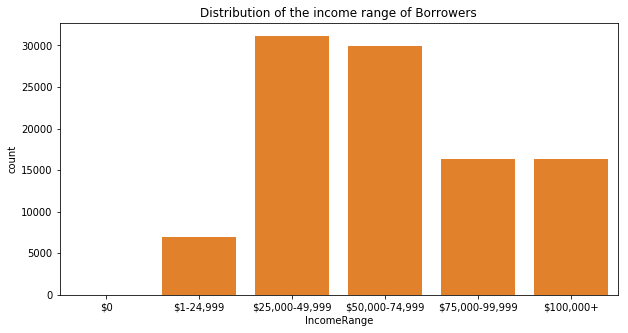

In [7]:

plt.figure(figsize=(10, 5));
sb.countplot(data=loan_df, x='IncomeRange', color=get_color());
plt.title('Distribution of the income range of Borrowers');

- Majority of the borrowers earn between $\$$25,000 to \$74,999

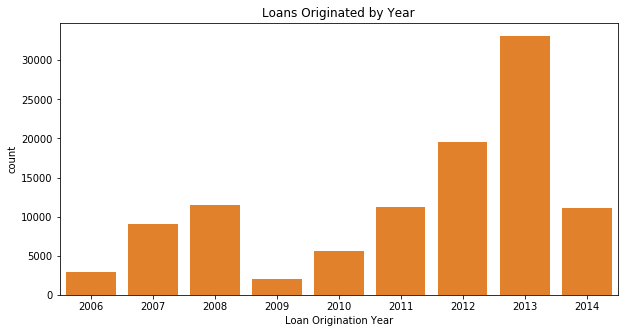

In [8]:
plt.figure(figsize=[10, 5])
sb.countplot(data=loan_df,x=loan_df['LoanOriginationDate'].dt.year,color=get_color())
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

- From the chart above, it shows that more loans were given in the year **2013**

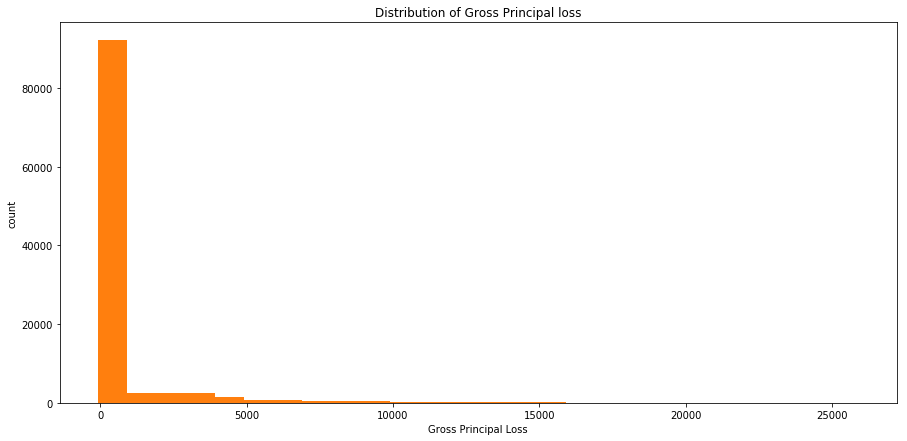

In [9]:
bins = np.arange(loan_df.LP_GrossPrincipalLoss.min(),loan_df.LP_GrossPrincipalLoss.max()+1000, 1000 )
plt.figure(figsize=(15,7))
plt.hist(loan_df.LP_GrossPrincipalLoss,bins=bins, color=get_color());
plt.title('Distribution of Gross Principal loss');
plt.xlabel('Gross Principal Loss');
plt.ylabel('count');

- The histogram above is Right Skewed. The chart shows that majority of the Losses are between 0 to 1000 dollars.

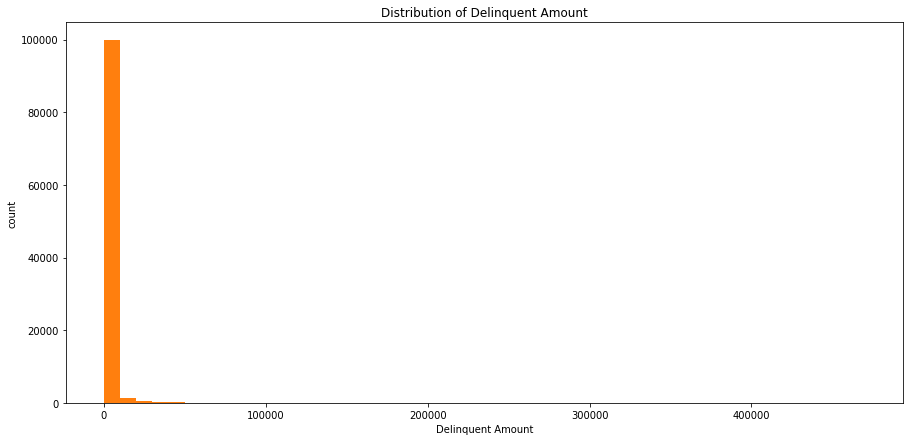

In [10]:
delinquent_df = loan_df[loan_df.AmountDelinquent.notna()]
bins = np.arange(delinquent_df.AmountDelinquent.min(),delinquent_df.AmountDelinquent.max()+10000, 10000)
plt.figure(figsize=(15,7))
plt.hist(delinquent_df.AmountDelinquent,bins=bins, color=get_color());
plt.title('Distribution of Delinquent Amount');
plt.xlabel('Delinquent Amount');
plt.ylabel('count');

- The Histogram chart above shows that majority of the Delinquent amount is between 0 to 10000 dollars

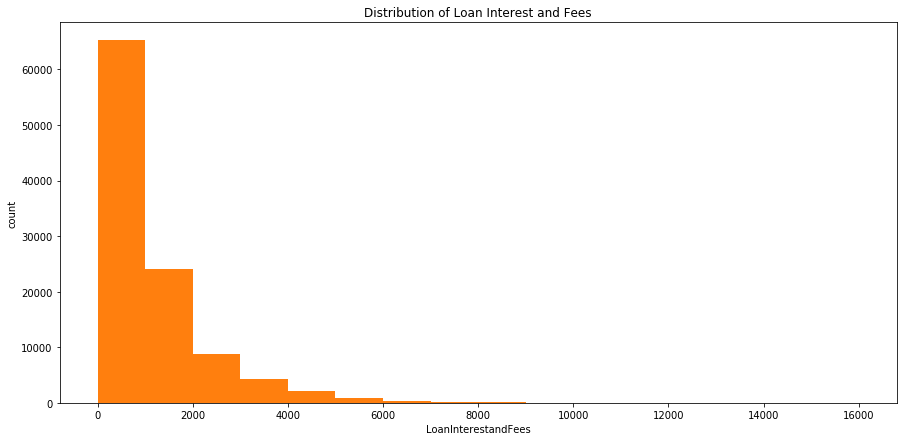

In [11]:
bins = np.arange(loan_df.LP_InterestandFees.min(),loan_df.LP_InterestandFees.max()+1000, 1000 )
plt.figure(figsize=(15,7))
plt.hist(loan_df.LP_InterestandFees,bins=bins, color=get_color());
plt.title('Distribution of Loan Interest and Fees');
plt.xlabel('LoanInterestandFees');
plt.ylabel('count');

- The histogram above is Right Skewed. It Depicts the distribution pattern of the loan interest. It shows that majority of the borrowers\' interest is between 0 to 2000 dollars.

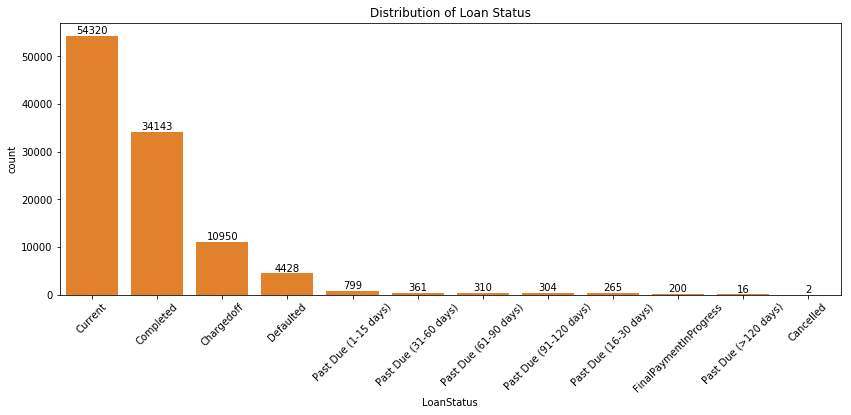

In [12]:
loan_df.LoanStatus.unique()
status_count = loan_df.LoanStatus.value_counts()
#print(loan_df.LoanStatus.value_counts())

color = sb.color_palette()[1]
plt.figure(figsize=(14, 5));
sb.countplot(data=loan_df, x='LoanStatus', color=get_color(), order = status_count.index);
plt.xticks(rotation=45);

for i in range(status_count.shape[0]):
    plt.text(i, status_count[i]+ 500, status_count[i], ha='center')
    
plt.title('Distribution of Loan Status');

 - The bar chart above shows the count of each category of the Loan Status of ProsperLoan borrowers.

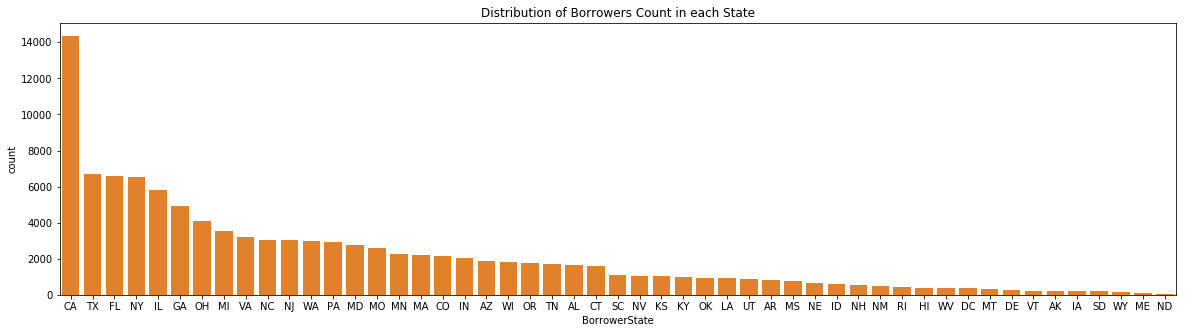

In [13]:
#state_df = loan_df[loan_df.BorrowerState.notna()]
top_state = loan_df.BorrowerState.value_counts();

plt.figure(figsize=(20, 5));
sb.countplot(data=loan_df, x='BorrowerState',order=top_state.index, color=get_color());
plt.title('Distribution of Borrowers Count in each State');

- The Bar Chart above depicts the count of Borrowers in each state in the United State, with California(CA) state having the highest number of borrowers, and North Dakota(ND) State having the lowest number of borrowers.

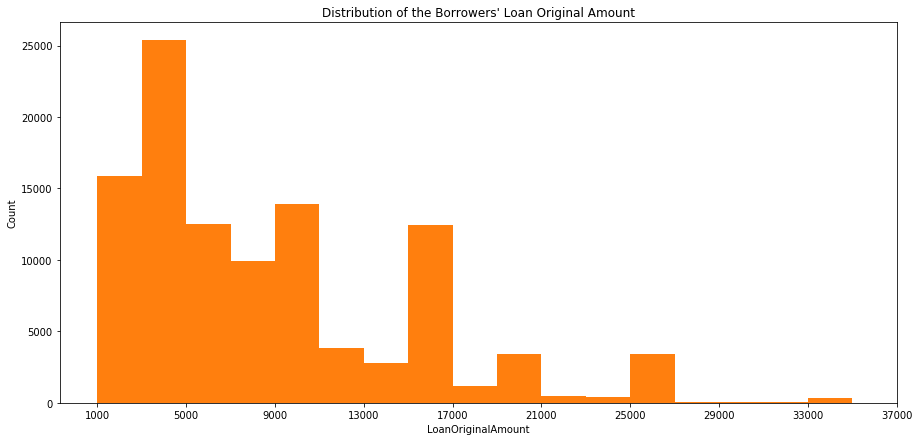

In [14]:
#Histogram distribution of LoanOriginalAmount
bin = np.arange(loan_df.LoanOriginalAmount.min(), loan_df.LoanOriginalAmount.max() + 2000, 2000)
plt.figure(figsize=(15,7))
plt.hist(loan_df.LoanOriginalAmount, bins=bin, color=get_color());
plt.xticks(np.arange(loan_df.LoanOriginalAmount.min(), loan_df.LoanOriginalAmount.max() + 4000, 4000));

plt.ylabel('Count');
plt.xlabel('LoanOriginalAmount');
plt.title('Distribution of the Borrowers\' Loan Original Amount' );

- The Histogram chart above depicts the distribution the Loan given to individual borrowers. The distribution shows that majority of the loan amount is between 1000 to 11000 Dollars.

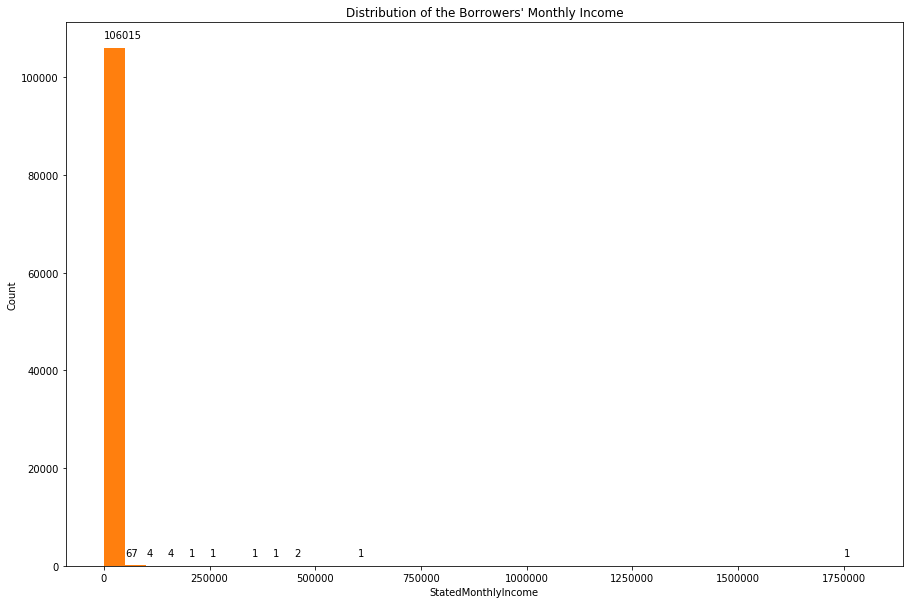

In [15]:
#Histgram distribution of amount earned by borrowers
plt.figure(figsize=(15,10));
bin = np.arange(loan_df.StatedMonthlyIncome.min(), loan_df.StatedMonthlyIncome.max() + 50000, 50000)
chart_return = plt.hist(loan_df.StatedMonthlyIncome, bins=bin, color=get_color());
chart_freq = chart_return[0]
chart_edge = chart_return[1]

#print(len(chart_freq))
#print(len(chart_edge))

def zero_check(value):
    if value == 0:
        return ""
    else:
        return "{:.0f}".format(value)

for i, j in enumerate(chart_edge):
    plt.text(j, chart_freq[i] + 2000, zero_check(chart_freq[i]), ha='left');
    if i == len(chart_freq) - 1:
        break
plt.ylabel('Count');
plt.xlabel('StatedMonthlyIncome');
plt.title('Distribution of the Borrowers\' Monthly Income' );

- The Chart above depicts that majority of the Borrowers earn between 0 to 50000 Dollars

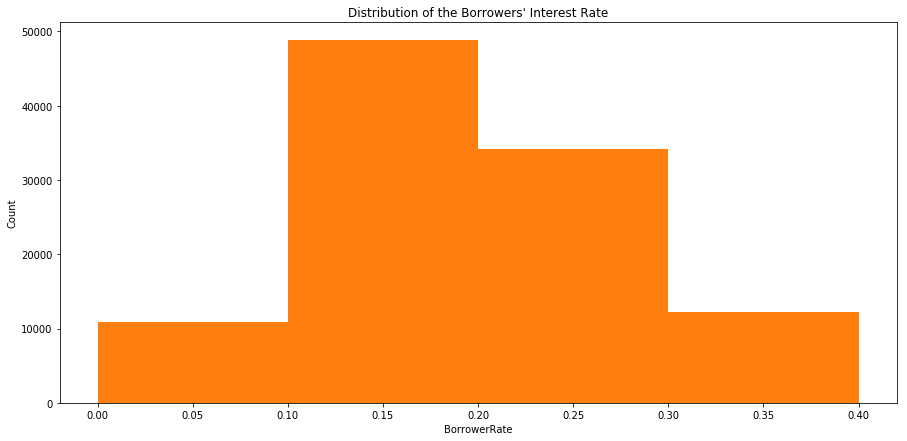

In [16]:
#Histogram of BorrowerRate
bin = np.arange(loan_df.BorrowerRate.min(), loan_df.BorrowerRate.max() + 0.1, 0.1)
plt.figure(figsize=(15,7))
plt.hist(loan_df.BorrowerRate, bins=bin, color=get_color());
#plt.xticks(np.arange(state_df.LoanOriginalAmount.min(), state_df.LoanOriginalAmount.max() + 4000, 4000));

plt.ylabel('Count');
plt.xlabel('BorrowerRate');
plt.title('Distribution of the Borrowers\' Interest Rate' );

- Histogram distribution of the Borrowers\' Interest rate. From the chart, it shows that the maximum interest rate so far is 0.40, and the minimum is 0. Though, the interest rate of the majority of the borrowers is between 0.10 to 0.20.

In [17]:
def score_check():
    score_df = loan_df.loc[loan_df['ProsperScore'].notna()]
    score_df['ProsperScore'] = score_df.ProsperScore.astype('int')
    return score_df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


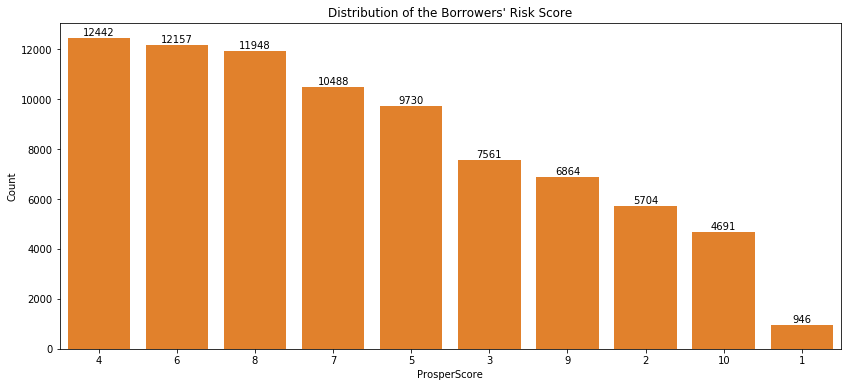

In [18]:
#Bar chart of ProsperLoan showing the number of Borrowers for each category of Risk Score

#score_df.ProsperScore.value_counts()
score_df = score_check()
score_count = score_df.ProsperScore.value_counts()

plt.figure(figsize=(14, 6));
color = sb.color_palette()[1]
sb.countplot(data=score_df, x='ProsperScore', color=get_color(), order=score_count.index);

for i, j in enumerate(score_count.values):
    plt.text(i, j+100, j, ha='center')
    
plt.ylabel('Count');
plt.xlabel('ProsperScore');
plt.title('Distribution of the Borrowers\' Risk Score' );

- Distribution of the Risk Scores of individual Borrower, With 10 being the best score, and 1 being the worst score

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - **ProserScore**:The disstribution of the ProsperScore which is also the risk score for each borrower shows that majority of the the borrowers scores were 4, 6, 8.Though a few of them got the worst score:1.
> - **BorrowerRate**:From the chart, it shows that the maximum interest rate so far is 0.40, and the minimum is 0. Though, the interest rate of the majority of the borrowers is between 0.10 to 0.20.
> - **LoanInterestandFees**: The Loan Interest histogram is Right Skewed. It Depicts the distribution pattern of the loan interest. It shows that majority of the borrowers' interest is between 0 to 2000 dollars.
> - **LoanOriginalAmount**: The histogram chart that depicts the Loan given to the borrowers is Right Skewed. It shows that majority of the Loan given to the borrowers is between 1000 t0 11000 Dollars.
> - **LoanGrossPrincipalLoss**: The histogram that depicts this feature shows that mjaority of the borrowers whose loan are considered as loss, have a maximum debt of 1000 dollars.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> According to ProsperLoan documentation, the ProsperScore(Risk Score) is supposed to be between 1 and 10. But from the dataset, I found out that borrowers were having RiskScore of 11 as opposed to the maximum score stated in the documentation. For my analysis, i filtered out the rows where the Risk Score is above 10.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

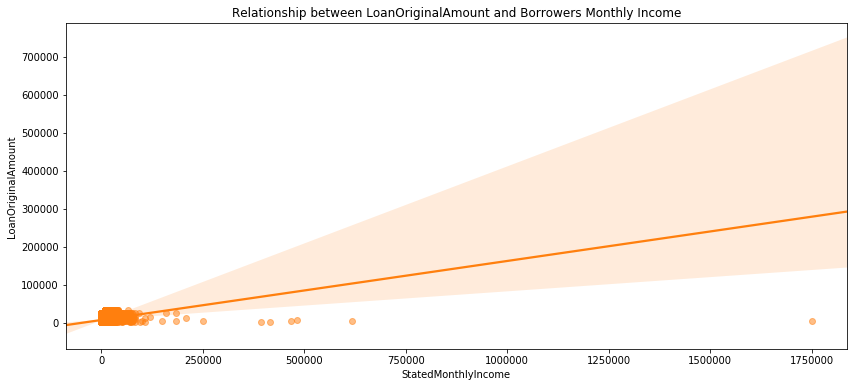

In [19]:
#Scatter plot showing the monthly income of the borrowers and their individual loan amount
plt.figure(figsize=(14, 6))
sb.regplot(data=loan_df, x='StatedMonthlyIncome', y='LoanOriginalAmount', scatter_kws={'alpha':0.5}, color=get_color());
plt.title('Relationship between LoanOriginalAmount and Borrowers Monthly Income');

- The scattered plot above depicts that ProsperLoan took consideration of the Monthly Income of the borrowers before issuing out Loans, i.e, the higher their income, the higher the loan they can access.

In [20]:
#Varying interest rate of borrowers with the same Loan amount but different rating scores.
#Using $4000 Loan amount as a case study
interest_df = score_check()
interest_df =  interest_df.loc[interest_df.LoanOriginalAmount == 4000]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


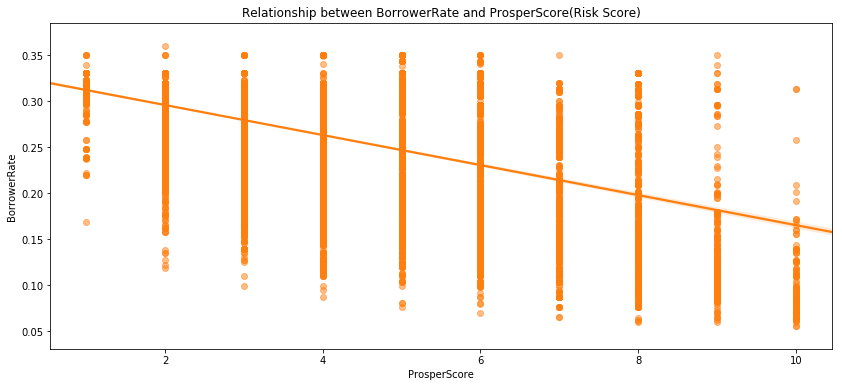

In [21]:
plt.figure(figsize=(14, 6))
sb.regplot(data=interest_df, x='ProsperScore', y='BorrowerRate', scatter_kws={'alpha':0.5}, color=get_color());
plt.title('Relationship between BorrowerRate and ProsperScore(Risk Score)');

- The plot above depicts the negative correlation between borrowers\' interest rate and the ProsperScore(Risk Score). Borrowers with High ratings got a lesser Interest rate.

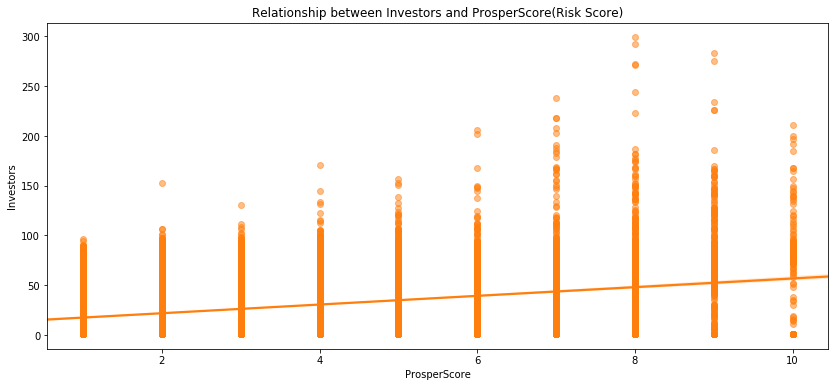

In [22]:
plt.figure(figsize=(14, 6))
sb.regplot(data=interest_df, x='ProsperScore', y='Investors', scatter_kws={'alpha':0.5}, color=get_color());
plt.title('Relationship between Investors and ProsperScore(Risk Score)');

- The scatter plot above depicts a positive correlation between Investors and ProsperScore(Risk Score).It shows that there are investors willing to invest on borrowers with high rating.

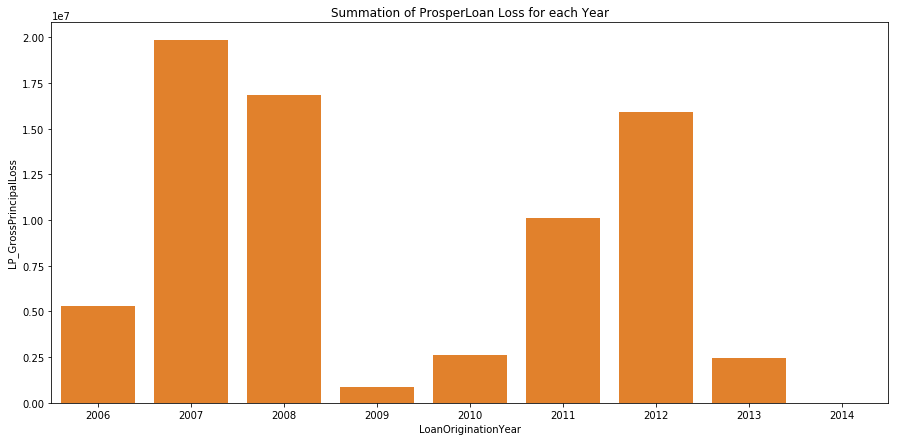

In [23]:
loan_df['LoanOriginationYear'] = loan_df['LoanOriginationDate'].dt.year
groupLoss_df = loan_df.groupby('LoanOriginationYear', as_index=False).sum()
plt.figure(figsize=(15, 7))
sb.barplot(data=groupLoss_df, x='LoanOriginationYear', y='LP_GrossPrincipalLoss', color=get_color());
plt.title('Summation of ProsperLoan Loss for each Year');

- The plot above depicts the accumulated loss for each year. As at the time of this report, there was no loss in year 2005 and 2014. They highest loss recorded was in year 2007.

In [24]:
# Top ten(10) States with high Percentage of Defaulters.
def loanStatus_Percent():
    group = loan_df.groupby(['BorrowerState', 'LoanStatus'], as_index=False).size()
    group_df = group.reset_index(name='Count')
    group_df = group_df.pivot('BorrowerState', 'LoanStatus', 'Count')
    #group_df['State'] = pd.Series(group_df.index.values)

    group_df.replace(to_replace = np.nan, value=0, inplace=True)
    group_df = group_df.astype(int)
    group_df['TotalBorrowers'] = group_df.sum(1)

    #Create a new columns to show the percentage of Defaulted, Chargedoff, and Completed Loans
    group_df['Percent_Defaulted'] = ((group_df.Defaulted / group_df.TotalBorrowers) * 100).round(1)
    group_df['Percent_Chargedoff'] = ((group_df.Chargedoff / group_df.TotalBorrowers) * 100).round(1)
    group_df['Percent_Completed'] = ((group_df.Completed / group_df.TotalBorrowers) * 100).round(1)

    group_df.reset_index(inplace=True)
    group_df.rename_axis(None, axis=1,inplace=True)
    return group_df

#group_df.sort_values('Percent_Defaulted', ascending=False, inplace=True)


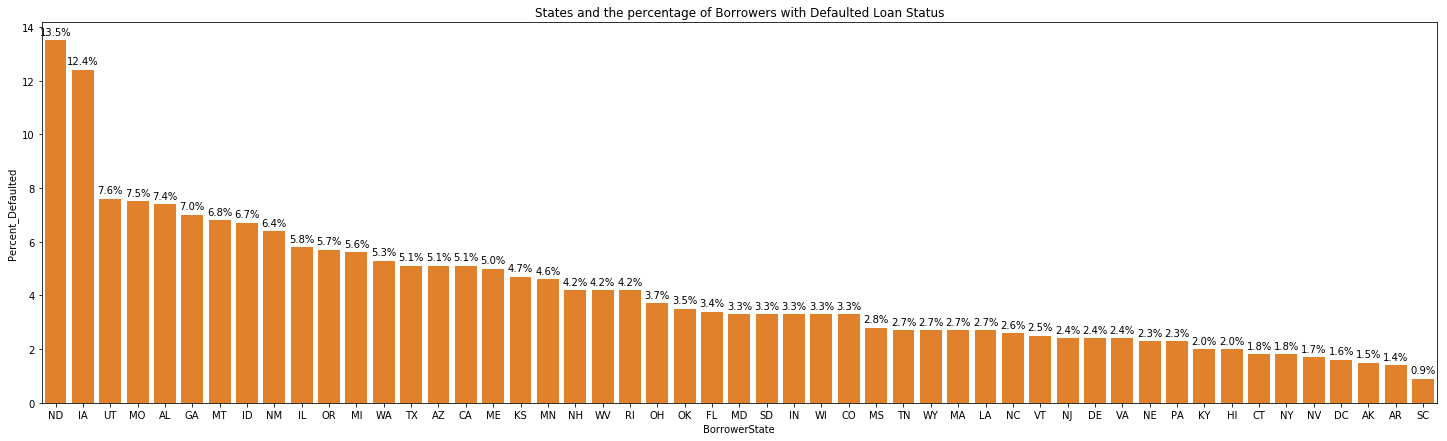

In [25]:
defaulted_df = loanStatus_Percent()
defaulted_df.sort_values('Percent_Defaulted', ascending=False, inplace=True)
percentage = defaulted_df.Percent_Defaulted.values

color = sb.color_palette()[1]
plt.figure(figsize=(25, 7))
sb.barplot(data=defaulted_df, x='BorrowerState', y='Percent_Defaulted', color=color);

for i, j in enumerate(percentage):
    plt.text(i, j+0.2, str(j)+'%', ha='center')
    
plt.title('States and the percentage of Borrowers with Defaulted Loan Status');

- The Bar chart depicts the percentage of borrowers with Defaulted Loan Status. From the graph, North Dakota(ND) has the highest percentage of Defaulters, and South Carolina(SC) has the lowest percentage of Defaulters.

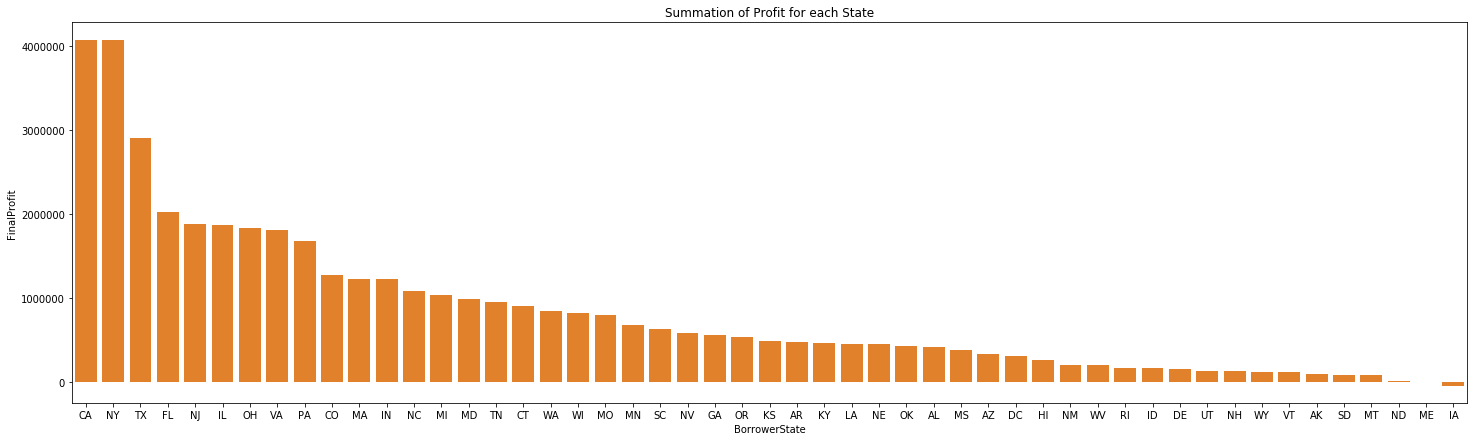

In [26]:

profit_df = loan_df.groupby('BorrowerState').sum()
profit_df['FinalProfit'] = profit_df.LP_InterestandFees - profit_df.LP_GrossPrincipalLoss
profit_df.reset_index('BorrowerState', inplace=True)
profit_df.sort_values('FinalProfit', ascending=False, inplace=True)

profit_df = profit_df.loc[:, ['BorrowerState', 'LP_InterestandFees', 'LP_GrossPrincipalLoss', 'FinalProfit']]

color = sb.color_palette()[1]
plt.figure(figsize=(25, 7))
sb.barplot(data=profit_df, x='BorrowerState', y='FinalProfit', color=color);
plt.title('Summation of Profit for each State');


- The Bar Plot above depicts the summation of profit for each State. From the plot, California(CA) has the highest profit, and IOWA(IA) state has no profit;rather, it made a loss.

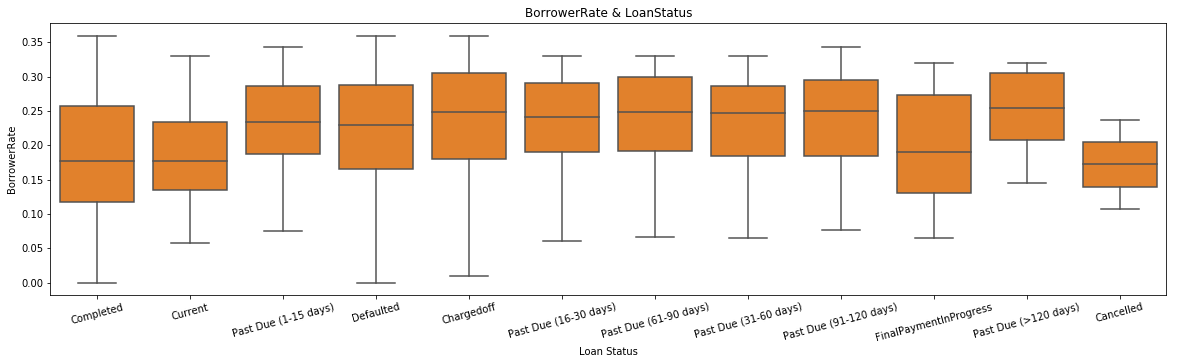

In [27]:
plt.figure(figsize = [20, 5])
sb.boxplot(data=loan_df,y='BorrowerRate',x='LoanStatus',color=color);
plt.title('BorrowerRate & LoanStatus');
plt.ylabel('BorrowerRate');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

- The Box Plot above depicts the interest Rate of Borrowers under different LoanSatus. From the plot, it's clearly evident that majority of the borrowers who have completed their Loan payment or in Final process, have low borrower rate, which also implies that they have an excellent risk score.

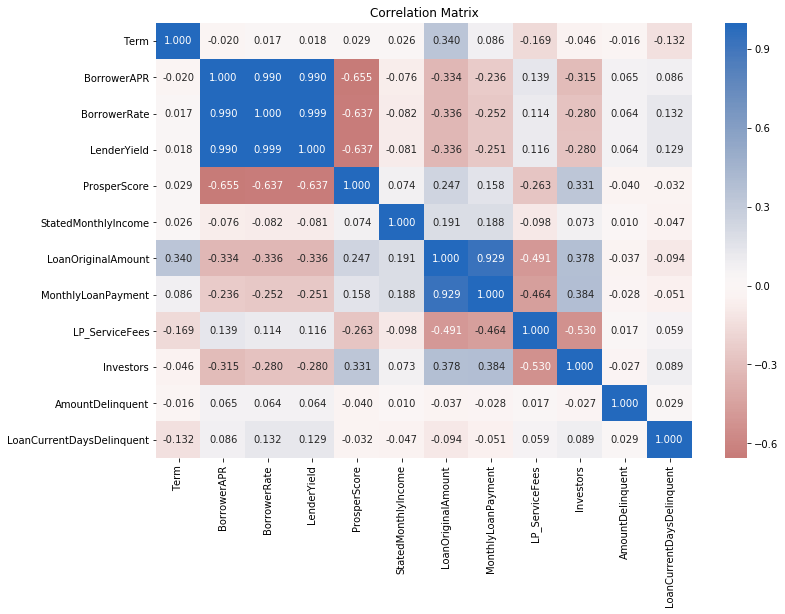

In [28]:
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors',
                    'AmountDelinquent','LoanCurrentDaysDelinquent']

# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(loan_df[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

- The Heatmap above depicts the correlation between some seleted features.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is a positive correlation relationship between the borrowers stated monthly income and the amount of loan they could access.From my observation, I think ProsperLoan use this relationship to determine the amount of loan a borrower can request for, in order to avert any form of delinquency of possible boss.

- There is a negative correlation relationship between the borrowers interest rate and their ProsperScore(Risk Score). Borrowers with amazing scores - between 8 and 10 -  got a lesser interest rate compared to customers with poor rating.

- After a careful investigation of the borrowers loan status and interest rate, I observed that majority of the customers with low interest rate have either completed their loans or in the final process, which in turn indicate that they have an excellent ProsperScore(Risk Score).

- There is a positive correlation relationship between the number of Investors and ProsperScore(Risk Score), reason being that every Entrepreneur would want to invest in a business that would yeild interest or has a lesser risk factor.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


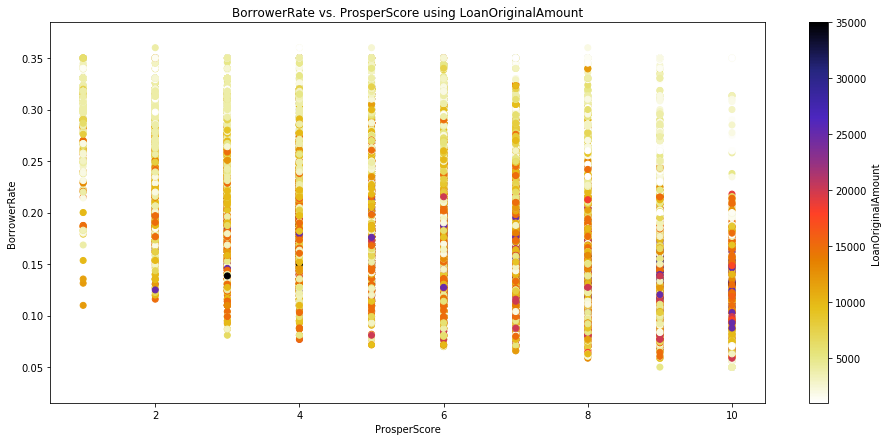

In [29]:
plt.figure(figsize = [16, 7]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=score_check(), x='ProsperScore',y='BorrowerRate',c='LoanOriginalAmount',cmap=cm) 

plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerRate vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate');


- The scatter plot above the relationship between the borrowers interest rate, ProserScore, and Loan amount. It is evident that majority of the borrowers who took lesser loan have high interset rate and poor Risk Score, meaning that they don't take their loan payment seriously. Also, majority of the customers who took higher loan have excellent rating and lesser ineterest rate because they took their payment seriously.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


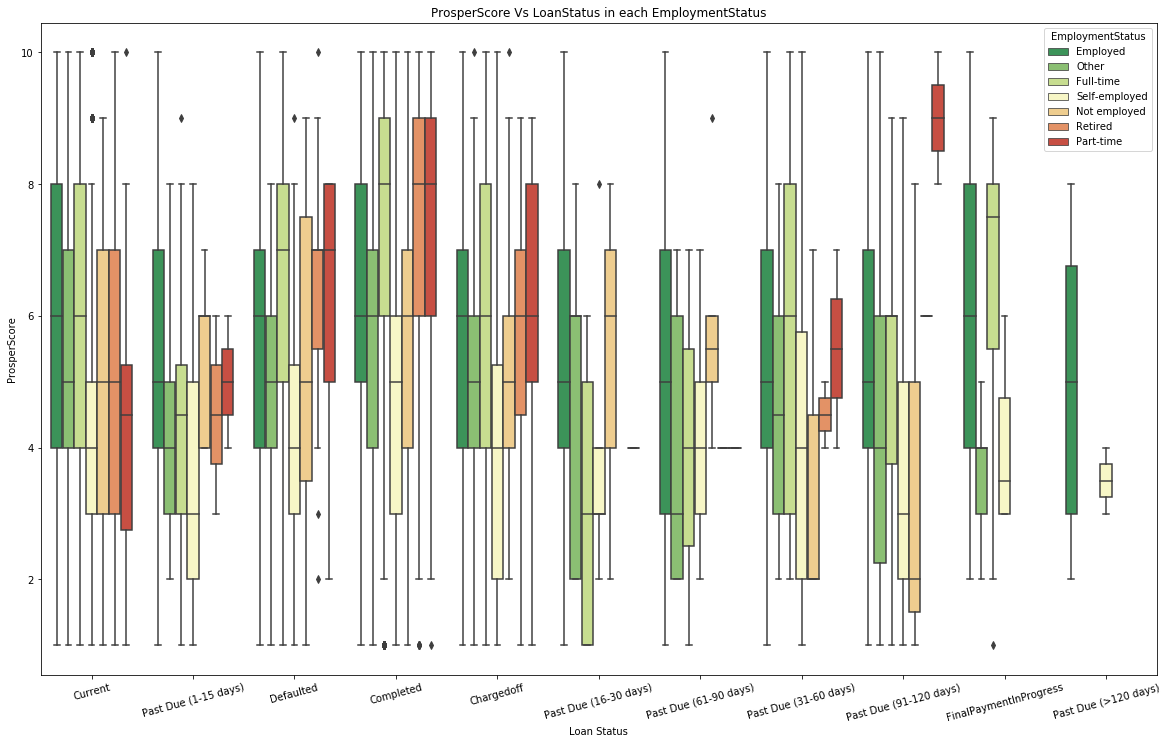

In [30]:
# LoanStatus Vs ProsperScore in each EmploymentStatus
#df = loan_df[loan_df.ProsperScore.map(lambda a: score_check(a))]
score_df = score_check()
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="ProsperScore", hue="EmploymentStatus", data=score_df, palette="RdYlGn_r");
plt.title('ProsperScore Vs LoanStatus in each EmploymentStatus');

plt.xlabel('Loan Status');
plt.ylabel('ProsperScore');
plt.xticks(rotation = 15);

- The plot above depicts the relationship between ProsperScore, Loan Status, and employment status of the borrowers. From the plot, it is evident that borrowers who are retired, full-time, and part-time workers have the highest ProseperScore(RiskScore), and borrowers who are Self-employed and not employed have have the worst ratings.

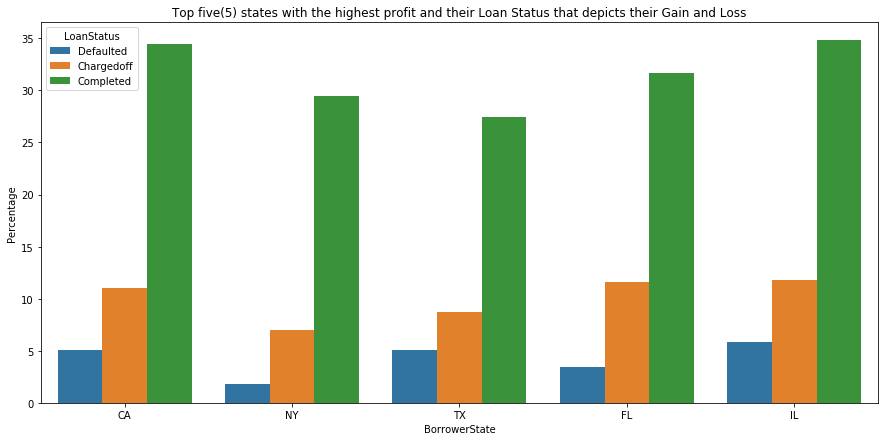

In [31]:
top5_state = ['CA','NY','TX','FL','IL']
least5_state = ['SD','MT','ND','ME','IA']

status_percent = loanStatus_Percent()
status_percent = status_percent.loc[:, ['BorrowerState','Percent_Defaulted','Percent_Chargedoff','Percent_Completed']]
status_percent.rename(columns={'Percent_Defaulted':'Defaulted', 'Percent_Chargedoff':'Chargedoff','Percent_Completed':'Completed'}, inplace=True)
new_percent = status_percent.melt(id_vars='BorrowerState', var_name='LoanStatus',value_name='Percentage')

top_5 = new_percent[new_percent.BorrowerState.map(lambda a: a in top5_state)]
least_5 = new_percent[new_percent.BorrowerState.map(lambda a: a in least5_state)]

plt.figure(figsize=(15, 7))
sb.barplot(data=top_5, x='BorrowerState', y='Percentage',order=top5_state, hue='LoanStatus');

#sb.barplot(data=least_5, x='BorrowerState', y='Percentage', hue='LoanStatus');
plt.title('Top five(5) states with the highest profit and their Loan Status that depicts their Gain and Loss');

- The bar plot above depicts the percentage of Loan Status that contributes to the profit and loss of the company.The plot shows that the percentage of chargedoff loans is below 12 percent, and Defaulted loan is below 7 percent.

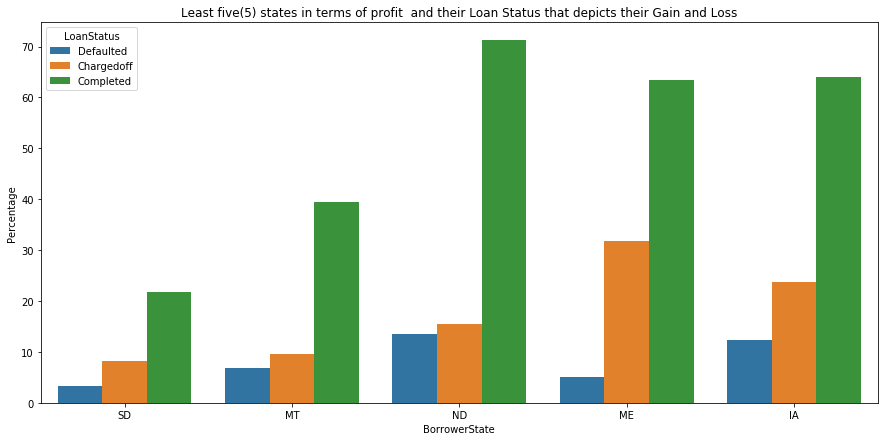

In [32]:
least_5 = new_percent[new_percent.BorrowerState.map(lambda a: a in least5_state)]

plt.figure(figsize=(15, 7))
sb.barplot(data=least_5, x='BorrowerState', y='Percentage',order=least5_state, hue='LoanStatus');
plt.title('Least five(5) states in terms of profit  and their Loan Status that depicts their Gain and Loss');

- The bar plot above depicts that the worst performing state in terms of profit have high percentage of Chargedoff and Defaulted Loans, compared to the Top five(5) with high profit.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  - Looking at the relationship between the borrowers interest rate, ProserScore, and Loan amount, It is evident that majority of the borrowers who took lesser loan have high interset rate and poor Risk Score, meaning that they don't take their loan payment seriously. Also, majority of the customers who took higher loan have excellent rating and lesser ineterest rate because they took their payment seriously.

> - From the relationship between ProsperScore, Loan Status, and employment status of the borrowers, it is evident that borrowers who are retired, full-time, and part-time workers have the highest ProseperScore(RiskScore), and borrowers who are Self-employed and not employed have have the worst ratings. What this means is that borrowers who are not employed and Self-employed hardly pay back their loans.

### Were there any interesting or surprising interactions between features?

> Borrowers who are high income earners are good at paying back their loans on time.

## Conclusions

> After all my exploration, below are some of my main findings.

- There is a positive correlation relationship between the borrowers stated monthly income and the amount of loan they could access.From my observation, I think ProsperLoan uses this relationship to determine the amount of loan a borrower can request for, in order to avert any form of delinquency of possible boss.

- There is a negative correlation relationship between the borrowers interest rate and their ProsperScore(Risk Score). Borrowers with amazing scores - between 8 and 10 - got a lesser interest rate compared to customers with poor rating.

- After a careful investigation of the borrowers loan status and interest rate, I observed that majority of the customers with low interest rate have either completed their loans or in the final process, which in turn indicate that they have an excellent ProsperScore(Risk Score).

- There is a positive correlation relationship between the number of Investors and ProsperScore(Risk Score), reason being that every Entrepreneur would want to invest in a business that would yeild interest or has a lesser risk factor.

- Looking at the relationship between the borrowers interest rate, ProserScore, and Loan amount, It is evident that majority of the borrowers who took lesser loan have high interset rate and poor Risk Score, meaning that they don't take their loan payment seriously. Also, majority of the customers who took higher loan have excellent rating and lesser ineterest rate because they took their payment seriously.
